# Data Exploration:

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 16, 8

from scipy.stats import norm
from scipy import stats

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('KS_train_data.csv')

In [3]:
df

,project_id,backers_count,blurb,category,converted_pledged_amount,country,created_at,currency,deadline,fx_rate,...,launched_at,name,pledged,staff_pick,usd_pledged,location,funded,subcategory,project_url,reward_url
0,KS_000000,80,I will be an artist-in-residence at Elsewhere ...,art,3596,US,1325980505,USD,1334866560,1.000000,...,1332969260,Elsewhere Studios artist-in-residency program!,3596.00,False,3596.000000,"Paonia, CO",True,mixed media,https://www.kickstarter.com/projects/hilaryeme...,https://www.kickstarter.com/projects/hilaryeme...
1,KS_000001,82,1000 Artists is a public art-making installati...,art,4586,US,1330926084,USD,1336440145,1.000000,...,1332984145,1000 Artists: Presidential Inauguration 2013,4586.00,False,4586.000000,"Washington, DC",True,public art,https://www.kickstarter.com/projects/17146650/...,https://www.kickstarter.com/projects/17146650/...
2,KS_000002,21,"The Sequel to ‘My Favorite Machine”, ""MyPhoneH...",art,5217,US,1332382894,USD,1338175739,1.000000,...,1332991739,MyPhoneHenge,5217.00,False,5217.000000,"Frisco, TX",True,sculpture,https://www.kickstarter.com/projects/belveal/m...,https://www.kickstarter.com/projects/belveal/m...
3,KS_000003,37,A film exploring the role and value of art edu...,art,7160,GB,1332342451,USD,1334806096,1.000000,...,1332991696,Walk-Through,7160.00,False,7160.000000,"Glasgow, UK",True,art,https://www.kickstarter.com/projects/107813091...,https://www.kickstarter.com/projects/107813091...
4,KS_000004,153,We need to build a kitchen for Habitable Space...,art,15445,US,1328562617,USD,1335584240,1.000000,...,1332992240,A kitchen for Habitable Spaces,15445.00,False,15445.000000,"Kingsbury, TX",True,public art,https://www.kickstarter.com/projects/104409276...,https://www.kickstarter.com/projects/104409276...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,KS_099995,104,Make the workshop/ small stage space at Jimmy'...,theater,7595,US,1348677893,USD,1356552252,1.000000,...,1353960252,"Help Fund the ""Back Room"" Arts Space at Jimmy'...",7595.43,False,7595.430000,"New York, NY",True,spaces,https://www.kickstarter.com/projects/jimmycarb...,https://www.kickstarter.com/projects/jimmycarb...
99996,KS_099996,307,Help create a permanent home for live comedy s...,theater,27196,US,1364939099,USD,1367674009,1.000000,...,1365082009,The Coalition Theater,27196.71,False,27196.710000,"Richmond, VA",True,spaces,https://www.kickstarter.com/projects/rvacomedy...,https://www.kickstarter.com/projects/rvacomedy...
99997,KS_099997,143,Voix de Ville is a pop-up imaginarium of neo-v...,theater,7226,US,1366078694,USD,1373738400,1.000000,...,1370568560,The Voix De Ville! : A Pop-up Theater and Cabaret,7226.00,True,7226.000000,"Cleveland, OH",True,spaces,https://www.kickstarter.com/projects/160171209...,https://www.kickstarter.com/projects/160171209...
99998,KS_099998,329,Help Synetic Theater create a new Studio to pr...,theater,31683,US,1372177000,USD,1376654340,1.000000,...,1373568644,Save the Studio!,31683.00,False,31683.000000,"Arlington, VA",True,spaces,https://www.kickstarter.com/projects/967829854...,https://www.kickstarter.com/projects/967829854...


In [4]:
df.describe()

,backers_count,converted_pledged_amount,created_at,deadline,fx_rate,goal,launched_at,pledged,usd_pledged
count,100000.000000,1.000000e+05,1.000000e+05,1.000000e+05,100000.000000,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05
mean,151.089430,1.241108e+04,1.400524e+09,1.406896e+09,1.017654,4.447512e+04,1.403972e+09,1.312485e+04,1.241284e+04
std,1163.024964,1.005545e+05,6.334581e+07,6.340574e+07,0.169773,1.256033e+06,6.360489e+07,1.080345e+05,1.005368e+05
min,0.000000,0.000000e+00,1.240366e+09,1.243556e+09,0.009337,1.000000e-02,1.240674e+09,0.000000e+00,0.000000e+00
25%,4.000000,1.250000e+02,1.349203e+09,1.357171e+09,1.000000,1.500000e+03,1.354313e+09,1.250000e+02,1.250000e+02
50%,28.000000,1.650000e+03,1.408426e+09,1.415244e+09,1.000000,5.000000e+03,1.412373e+09,1.635500e+03,1.651000e+03
75%,86.000000,6.271250e+03,1.447206e+09,1.454243e+09,1.000000,1.200000e+04,1.451252e+09,6.310000e+03,6.275042e+03
max,105857.000000,1.026684e+07,1.517539e+09,1.518702e+09,1.401112,1.000000e+08,1.518037e+09,1.026685e+07,1.026685e+07


<AxesSubplot:>

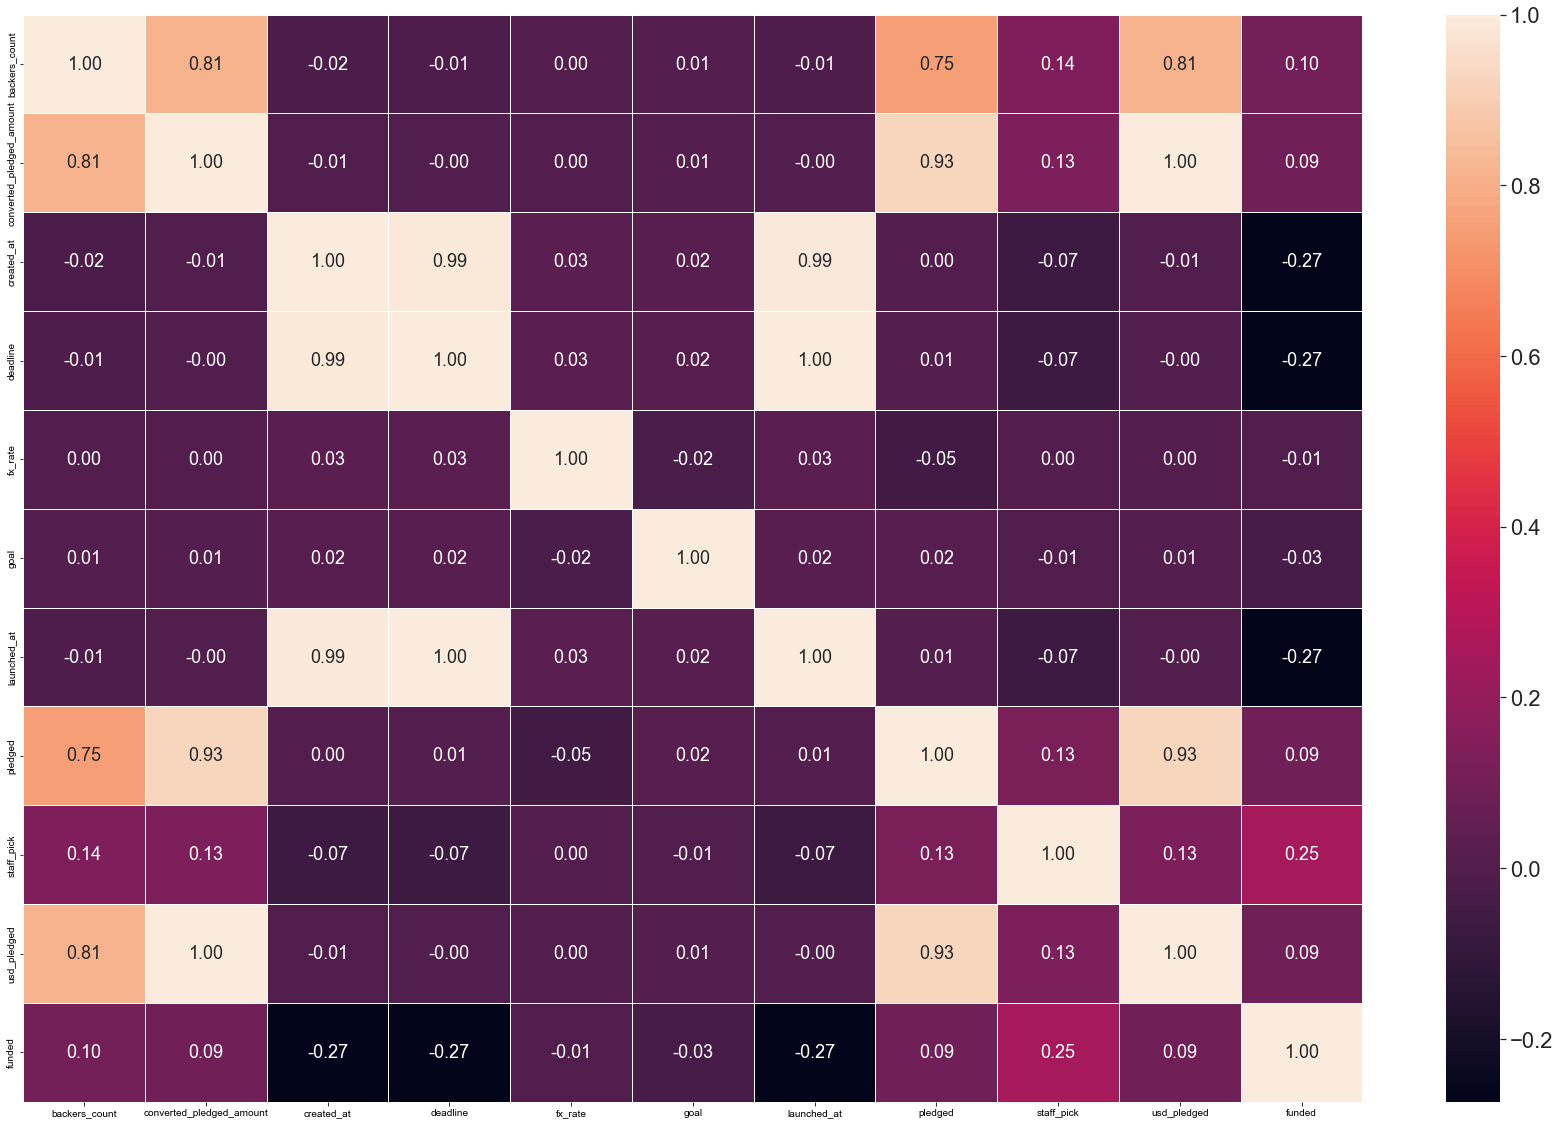

In [5]:
corrmat = df.corr()
fig, ax = plt.subplots(figsize=(30,20))         # Sample figsize in inches
sns.set(font_scale=2)
sns.heatmap(corrmat, annot=True, linewidths=.5, ax=ax, fmt = ".2f", annot_kws={"size":18})

##### From the heat map, not much could be said about the data, except that the number of backers (backer_count) correlates witht the pledged money. Other than that, is that there is a small correlation (o.25) between staff_pick and funded. There is also some correlation with the times that we will not go into as those are most probably not very informative. However, we know that the heat map does not show us any categorical data. Hence, we plot some could-be interesting features.

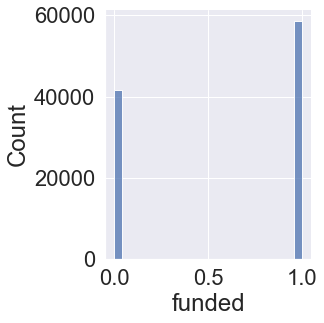

In [6]:
# distribution of funded campaigns 
sns.displot(df.funded.transform(int))
# almost 59% were funded project and 39% not

Here we plot the intial goal and wether it has been funded or not

<AxesSubplot:xlabel='funded', ylabel='goal'>

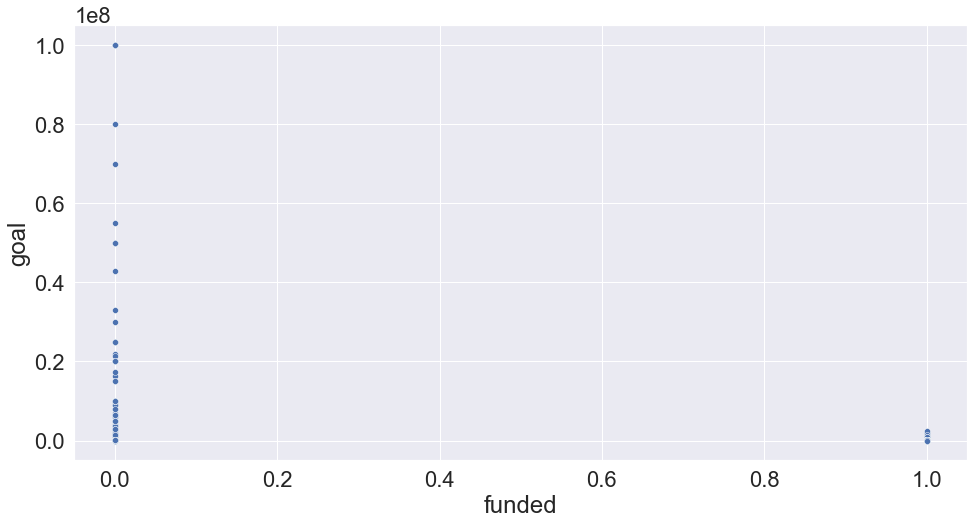

In [7]:
sns.scatterplot(df.funded.transform(int), df.goal)

Here we can already see that all of the funded campaigns have approximatly the same range (goal amount). As for the not funded they are more distributed, even some outliers could be noticed. 
## hence goal is an important feature

Next we plot funded against the category and sub category, but first we need to one-hot encode those categorical data.

In [8]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()

In [9]:
# first we do categories
enc.fit(np.asarray(df.category).reshape(-1, 1))
encoded_cat = enc.transform(np.asarray(df.category).reshape(-1,1))
print(encoded_cat.shape)
enc.get_feature_names()

(100000, 15)


array(['x0_art', 'x0_comics', 'x0_crafts', 'x0_dance', 'x0_design',
       'x0_fashion', 'x0_film & video', 'x0_food', 'x0_games',
       'x0_journalism', 'x0_music', 'x0_photography', 'x0_publishing',
       'x0_technology', 'x0_theater'], dtype=object)

# TODO

In [10]:
# here we plot it against funded











In [11]:
# second we do sub-categories
enc.fit(np.asarray(df.subcategory).reshape(-1, 1))
encoded_subcat = enc.transform(np.asarray(df.subcategory).reshape(-1,1))
print(encoded_subcat.shape)
enc.get_feature_names()

(100000, 158)


array(['x0_3d printing', 'x0_academic', 'x0_accessories', 'x0_action',
       'x0_animals', 'x0_animation', 'x0_anthologies', 'x0_apparel',
       'x0_apps', 'x0_architecture', 'x0_art', 'x0_art books', 'x0_audio',
       'x0_bacon', 'x0_blues', 'x0_calendars', 'x0_camera equipment',
       'x0_candles', 'x0_ceramics', "x0_children's books",
       'x0_childrenswear', 'x0_chiptune', 'x0_civic design',
       'x0_classical music', 'x0_comedy', 'x0_comic books', 'x0_comics',
       'x0_community gardens', 'x0_conceptual art', 'x0_cookbooks',
       'x0_country & folk', 'x0_couture', 'x0_crafts', 'x0_crochet',
       'x0_dance', 'x0_design', 'x0_digital art', 'x0_diy',
       'x0_diy electronics', 'x0_documentary', 'x0_drama', 'x0_drinks',
       'x0_electronic music', 'x0_embroidery', 'x0_events',
       'x0_experimental', 'x0_fabrication tools', 'x0_faith', 'x0_family',
       'x0_fantasy', "x0_farmer's markets", 'x0_farms', 'x0_festivals',
       'x0_fiction', 'x0_film & video', 'x0_fi

# TODO

In [12]:
# and we plot it against funded






In [13]:
# we also one hot encode countries and see if that could have any correlaion with the campaign being funded or not
enc.fit(np.asarray(df.country).reshape(-1, 1))
encoded_country = enc.transform(np.asarray(df.country).reshape(-1,1))
print(encoded_country.shape)
enc.get_feature_names()

(100000, 175)


array(['x0_?', 'x0_AE', 'x0_AF', 'x0_AG', 'x0_AM', 'x0_AQ', 'x0_AR',
       'x0_AT', 'x0_AU', 'x0_AX', 'x0_BA', 'x0_BB', 'x0_BD', 'x0_BE',
       'x0_BF', 'x0_BG', 'x0_BJ', 'x0_BO', 'x0_BR', 'x0_BS', 'x0_BT',
       'x0_BY', 'x0_BZ', 'x0_CA', 'x0_CD', 'x0_CF', 'x0_CG', 'x0_CH',
       'x0_CI', 'x0_CK', 'x0_CL', 'x0_CM', 'x0_CN', 'x0_CO', 'x0_CR',
       'x0_CU', 'x0_CW', 'x0_CY', 'x0_CZ', 'x0_DE', 'x0_DJ', 'x0_DK',
       'x0_DM', 'x0_DO', 'x0_DZ', 'x0_EC', 'x0_EE', 'x0_EG', 'x0_ES',
       'x0_ET', 'x0_FI', 'x0_FJ', 'x0_FM', 'x0_FO', 'x0_FR', 'x0_GA',
       'x0_GB', 'x0_GE', 'x0_GH', 'x0_GL', 'x0_GM', 'x0_GN', 'x0_GP',
       'x0_GQ', 'x0_GR', 'x0_GT', 'x0_GU', 'x0_GY', 'x0_HK', 'x0_HN',
       'x0_HR', 'x0_HT', 'x0_HU', 'x0_ID', 'x0_IE', 'x0_IL', 'x0_IN',
       'x0_IQ', 'x0_IR', 'x0_IS', 'x0_IT', 'x0_JM', 'x0_JO', 'x0_JP',
       'x0_KE', 'x0_KG', 'x0_KH', 'x0_KP', 'x0_KR', 'x0_KW', 'x0_KZ',
       'x0_LA', 'x0_LB', 'x0_LC', 'x0_LK', 'x0_LR', 'x0_LT', 'x0_LU',
       'x0_LV', 'x0_L

# TODO

In [14]:
# and we plot it against funded












### Dealing with Null values

In [15]:
#Null values
df.isnull().sum()

project_id                  0
backers_count               0
blurb                       2
category                    0
converted_pledged_amount    0
country                     3
created_at                  0
currency                    0
deadline                    0
fx_rate                     0
goal                        0
launched_at                 0
name                        1
pledged                     0
staff_pick                  0
usd_pledged                 0
location                    0
funded                      0
subcategory                 0
project_url                 0
reward_url                  0
dtype: int64

In total there are 2 blurbs, 3 countries, and 1 name missing. 

In [16]:
#Rows with null values
df[df.isnull().any(axis=1)]

,project_id,backers_count,blurb,category,converted_pledged_amount,country,created_at,currency,deadline,fx_rate,...,launched_at,name,pledged,staff_pick,usd_pledged,location,funded,subcategory,project_url,reward_url
1857,KS_001857,10,A light artist interested the universal urge t...,art,1318,NaN,1492523493,USD,1499097394,1.000000,...,1495209394,Ancient Rock Art and the San Tribes of Namibia,1318.0,False,1318.000000,"Windhoek, Namibia",False,conceptual art,https://www.kickstarter.com/projects/113391799...,https://www.kickstarter.com/projects/113391799...
5423,KS_005423,5,NaN,art,220,US,1320612894,USD,1323061140,1.000000,...,1320620155,NaN,220.0,False,220.000000,"Milan, IN",False,painting,https://www.kickstarter.com/projects/175143760...,https://www.kickstarter.com/projects/175143760...
27780,KS_027780,39,NaN,fashion,8675,DE,1504364375,EUR,1507625188,1.245664,...,1505033188,Ready to wear,7372.0,False,8873.674115,"Munich, Germany",False,ready-to-wear,https://www.kickstarter.com/projects/130359187...,https://www.kickstarter.com/projects/130359187...
46838,KS_046838,25,We're from the Kavango Region in Namibia. We ...,food,1657,NaN,1445612769,USD,1449950496,1.000000,...,1447358496,Butcher Boys of Bagani,1657.0,False,1657.000000,"Rundu, Namibia",True,food trucks,https://www.kickstarter.com/projects/823745415...,https://www.kickstarter.com/projects/823745415...
56883,KS_056883,68,I am heading on a 5 Gyres Voyage in JAN 2011 t...,journalism,3610,NaN,1286564530,USD,1291845600,1.000000,...,1288295782,ON A BOAT to raise awareness on PLASTIC POLLUT...,3610.0,False,3610.000000,"Walvis Bay, Namibia",True,journalism,https://www.kickstarter.com/projects/163937299...,https://www.kickstarter.com/projects/163937299...


In [17]:
# Median of the country column 
df.country.value_counts()

US    76716
GB     8015
CA     3511
AU     1793
DE      969
      ...  
AX        1
GQ        1
CW        1
ME        1
UY        1
Name: country, Length: 174, dtype: int64

Since US is the most occuring in the data, we fill the three missing values in the country columns with US.

In [18]:
df.country = df.country.fillna(df.country.mode().iloc[0])
df.country.isnull().sum()

0

As for the 2 missing blurbs and 1 name, it happens to be that one row is missing both the blurb and the name, this will be dropped.

The other row is only missing the blurb, however after checking the link provided it happens to be that the information provided in the website is curropted such that the information about that campaing are not available, hence this also will be dropped.

In [19]:
# the rows before 
df[df.isnull().any(axis=1)]

,project_id,backers_count,blurb,category,converted_pledged_amount,country,created_at,currency,deadline,fx_rate,...,launched_at,name,pledged,staff_pick,usd_pledged,location,funded,subcategory,project_url,reward_url
5423,KS_005423,5,NaN,art,220,US,1320612894,USD,1323061140,1.000000,...,1320620155,NaN,220.0,False,220.000000,"Milan, IN",False,painting,https://www.kickstarter.com/projects/175143760...,https://www.kickstarter.com/projects/175143760...
27780,KS_027780,39,NaN,fashion,8675,DE,1504364375,EUR,1507625188,1.245664,...,1505033188,Ready to wear,7372.0,False,8873.674115,"Munich, Germany",False,ready-to-wear,https://www.kickstarter.com/projects/130359187...,https://www.kickstarter.com/projects/130359187...


In [20]:
df = df.drop([5423,27780])

In [21]:
# the rows after are gone
df[df.isnull().any(axis=1)]

,project_id,backers_count,blurb,category,converted_pledged_amount,country,created_at,currency,deadline,fx_rate,...,launched_at,name,pledged,staff_pick,usd_pledged,location,funded,subcategory,project_url,reward_url


# Feature derivation:

# Modelling:

# Evaluation: